<a href="https://colab.research.google.com/github/valeriylo/Med_img_analysis/blob/master/Practicum3_lung_segmentation_Lobanov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This is the second practical task of Sirius summer school "Applying AI for Med image analysis". 
Practical tasks take form of jupyter notebook with example code in the begging and some tasks in the end. Please, provide your solution in form of python code. Read hints, google a lot, don't hesitate to ask us directyl and most importatly - 
<span style="color:blue">have fun</span>.


**Topic**: Deep learning segmentation 

**To submit**: New version of the notebook, with your code. 

Loading dataset for segmentation is a bit different from simple classification. Below is full dataset class, which loads image and corresponding segmentation mask. 

In [1]:
#to read mask files
!pip install imageio

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/Sirius 2020/'

In [4]:
import numpy as np
import imageio
import torch
from torch.utils.data import Dataset,DataLoader
import os 
import matplotlib.pyplot as plt
import albumentations as albu
from albumentations.core.composition import Compose
from albumentations.pytorch import ToTensor
from sklearn.model_selection import train_test_split

class LungSegmentationDataset(Dataset):
    def __init__(self,image_list,augmentations=None,transformations=None):
        self.path = "/content/drive/My Drive/Sirius 2020/data/Lung images from Bram"
        self.images = image_list
        self.augmentations = augmentations
        self.transformations = transformations
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self,index):
        filename = self.images[index]
        image = imageio.imread(os.path.join(self.path,"Images/"+filename))
        mask_name = filename.split(".")[0]+".gif"
        left_lung = imageio.imread(os.path.join(self.path,"scratch/masks/left lung/"+mask_name))
        right_lung = imageio.imread(os.path.join(self.path,"scratch/masks/right lung/"+mask_name))
        lungs = left_lung + right_lung
        result = {"image":image,"mask":lungs}
        
        if self.transformations:
            result = self.transformations(**result)
            
        if self.augmentations:
            result = self.augmentations(**result)
        return result

In [5]:
images = os.listdir("/content/drive/My Drive/Sirius 2020/data/Lung images from Bram/Images")
transorms = Compose([albu.augmentations.transforms.Resize(224,224),ToTensor()])
train,test = train_test_split(images,test_size=0.2)
train = LungSegmentationDataset(train,transformations=transorms)
test = LungSegmentationDataset(test,transformations=transorms)

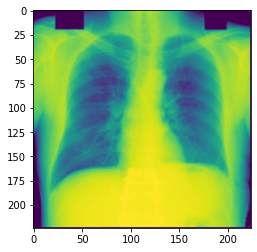

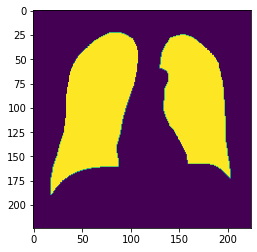

In [6]:
sample = train[0]
plt.imshow(sample['image'][0])
plt.show()
plt.imshow(sample['mask'][0]);

In [7]:
np.round(sample['image'])

tensor([[[0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [8]:
!pip install segmentation-models-pytorch

     |████████████████████████████████| 87 kB 3.7 MB/s 
     |████████████████████████████████| 58 kB 5.8 MB/s 
     |████████████████████████████████| 376 kB 17.0 MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-py3-none-any.whl size=12421 sha256=76a19099c7e50e2da4cff706f565031a311862b75ae8655a09efc6225156ca8f
  Stored in directory: /root/.cache/pip/wheels/90/6b/0c/f0ad36d00310e65390b0d4c9218ae6250ac579c92540c9097a
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=599151f447e461d5bec74915113f81bd88e5bbf8e23bf5619417a94d891f5817
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d42de2740d3544db96aefef63bda3f2c1761b3334f4873
Successfully built efficientnet-pytorch pretrainedmodels


## **Task 2:**
- Your task is to create training loop and train some model to output segmentation. We won't judge model quality, just the corectness of training loop. To get some inspiration:
- Given: Dataset class for lung segmentation
- Do: Create training loop, which will fit **any** segmentation model with proper loss function. 


- https://www.learnopencv.com/pytorch-for-beginners-semantic-segmentation-using-torchvision/
- https://medium.com/analytics-vidhya/pytorch-implementation-of-semantic-segmentation-for-single-class-from-scratch-81f96643c98c

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

torch.Size([3, 224, 224])
torch.Size([1, 224, 224])
torch.Size([1, 3, 224, 224])


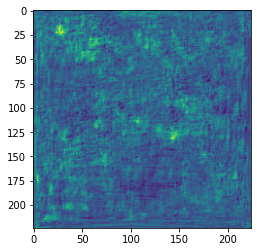

In [9]:
import segmentation_models_pytorch as smp

model = smp.Unet('resnet34', classes=1)

print(sample['image'].shape)
print(sample['mask'].shape)
print(sample['image'].unsqueeze(0).shape)
res = model(sample['image'].unsqueeze(0))
plt.imshow(res.detach().numpy()[0,0]);

In [10]:
if torch.cuda.is_available():     # Make sure GPU is available
    dev = torch.device("cuda:0")
    kwar = {'num_workers': 8, 'pin_memory': True}
    cpu = torch.device("cpu")
else:
    print("Warning: CUDA not found, CPU only.")
    dev = torch.device("cpu")
    kwar = {}
    cpu = torch.device("cpu")

np.random.seed(551)

In [11]:
from torch import optim
import segmentation_models_pytorch as smp

model = smp.Unet('resnet34', classes=1).to(dev)

#train = np.round(train)
#test = np.round(test)

train_loader = DataLoader(train,batch_size=10)
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [12]:
num_epochs = 20
train_loss = 0

for i in range(num_epochs):

    train_loss = 0
    
    for sample in train_loader:
        image, label = sample['image'], sample['mask']
        image, label = image.to(dev), label.to(dev)
        prediction = model(image) 

        # print(image.shape)
        # print(label.shape)
        # print(prediction.shape)

        optimizer.zero_grad()
        loss = criterion(prediction, label)
        loss.backward()
        optimizer.step() 

        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    print("Epoch = ", i, "Training loss = ", train_loss)

Epoch =  0 Training loss =  0.4457743003964424
Epoch =  1 Training loss =  0.13538699187338352
Epoch =  2 Training loss =  0.07046908792108297
Epoch =  3 Training loss =  0.04994298666715622
Epoch =  4 Training loss =  0.04054605234414339
Epoch =  5 Training loss =  0.03615117091685534
Epoch =  6 Training loss =  0.03372872620820999
Epoch =  7 Training loss =  0.03263873709365726
Epoch =  8 Training loss =  0.035442046262323855
Epoch =  9 Training loss =  0.033467738050967456
Epoch =  10 Training loss =  0.031602315977215766
Epoch =  11 Training loss =  0.03326556831598282
Epoch =  12 Training loss =  0.03470811825245619
Epoch =  13 Training loss =  0.03811185378581285
Epoch =  14 Training loss =  0.03611381249502301
Epoch =  15 Training loss =  0.031002948246896266
Epoch =  16 Training loss =  0.02436003163456917
Epoch =  17 Training loss =  0.021603534277528525
Epoch =  18 Training loss =  0.020179249159991742
Epoch =  19 Training loss =  0.01919133448973298


In [13]:
from PIL import Image
def mask_to_image(mask):
    return Image.fromarray(mask.astype(np.uint8))

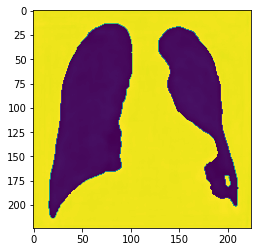

In [14]:
sample = test[0]
model.eval()
res = model(sample['image'].unsqueeze(0).to(dev))

plt.imshow(mask_to_image(res.detach().cpu().numpy()[0,0]));